In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression

In [2]:
data = pd.read_csv("Student_Performance.csv")


In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.shape

(10000, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [16]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,NaN,9,1,91.0
1,4,82,NaN,4,2,65.0
2,8,51,NaN,7,2,45.0
3,5,52,NaN,5,2,36.0
4,7,75,NaN,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,NaN,4,2,23.0
9996,7,64,NaN,8,5,58.0
9997,6,83,NaN,8,5,74.0
9998,9,97,NaN,7,0,95.0


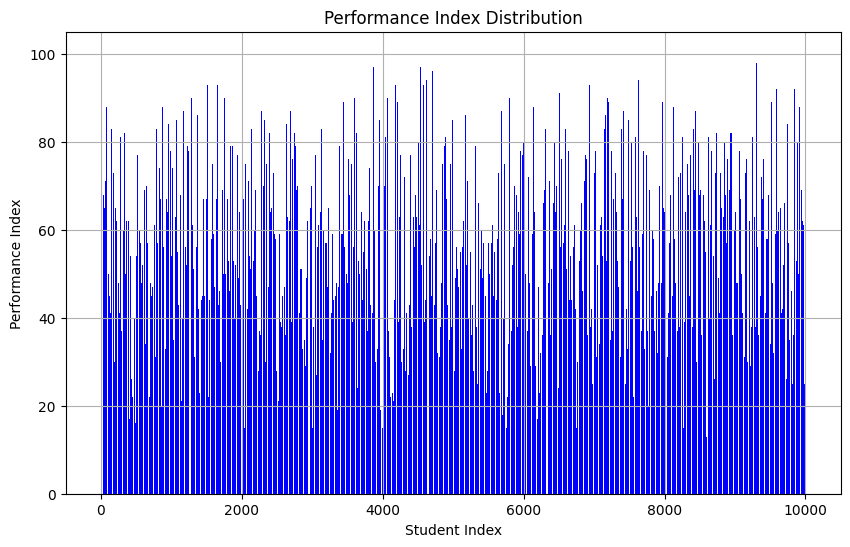

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(data['Performance Index'])), data['Performance Index'], color='blue')

# Add labels and title
plt.title('Performance Index Distribution')
plt.xlabel('Student Index')
plt.ylabel('Performance Index')

# Show the grid
plt.grid(True)

# Display the plot
plt.show()

In [10]:
x = data.drop(columns="Performance Index")
y = data["Performance Index"]

x,y

(      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
 0                 7               99                           1            9   
 1                 4               82                           0            4   
 2                 8               51                           1            7   
 3                 5               52                           1            5   
 4                 7               75                           0            8   
 ...             ...              ...                         ...          ...   
 9995              1               49                           1            4   
 9996              7               64                           1            8   
 9997              6               83                           1            8   
 9998              9               97                           1            7   
 9999              7               74                           0            8   
 
       Sample 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
accuracy = model.score(x_test,y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.90%
